In [2]:
import os
import json
import pandas as pd
import random
from pathlib import Path
import numpy as np
from math import pi, cos, sin
import cv2 as cv
import matplotlib.pyplot as plt
import shutil
from circum import xy_values

In [3]:
os.chdir("/home/kiprono/Documents/STELLENBOSCH UNIVERISTY/Masters by Research/\
Mask RCNN/Annotation projects/ACFR/apples")

In [4]:
train_csv = os.path.join(os.getcwd(),"train_csv")
train_images = os.path.join(os.getcwd(),"train_images")
filesList = os.listdir(train_csv)
file_ = random.choice(filesList)
df = pd.read_csv(os.path.join(train_csv,file_))
df
image_name = file_.replace(".csv",".png")

In [5]:
#for one csv file
for row in range(len(df)):
    df.at[row,"filename"] = image_name
    df.at[row,"file_size"] = Path(os.path.join(train_images,image_name)).stat().st_size
    img = cv.imread(os.path.join(train_images,image_name))
    df.at[row,"file_attributes"] = '{}'
    df.at[row,"region_count"] = len(df)
    df.at[row,'region_id'] = row
    t = {'name':'polygon','all_points_x':None,'all_points_y':None}
    x,y = xy_values(df.at[row,"c-x"],df.at[row,"c-y"],df.at[row,"radius"],img.shape[0],img.shape[1])
    t['all_points_x']  = x
    t['all_points_y'] = y
    df.at[row,'region_shape_attributes'] = object()
    df.at[row,'region_shape_attributes'] = t
    df.at[row,"region_attributes"] = '{}'

In [6]:
df

,#item,c-x,c-y,radius,label,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,0,230.28,178.89,20.09,1,20130320T013114.145799_32.png,115798.0,{},13.0,0.0,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
1,1,215.28,117.50,20.09,1,20130320T013114.145799_32.png,115798.0,{},13.0,1.0,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
2,2,216.67,77.22,18.98,1,20130320T013114.145799_32.png,115798.0,{},13.0,2.0,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
3,3,268.89,100.83,18.98,1,20130320T013114.145799_32.png,115798.0,{},13.0,3.0,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
4,4,248.33,50.00,17.31,1,20130320T013114.145799_32.png,115798.0,{},13.0,4.0,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
5,5,301.11,52.78,18.98,1,20130320T013114.145799_32.png,115798.0,{},13.0,5.0,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
6,6,268.61,3.06,17.31,1,20130320T013114.145799_32.png,115798.0,{},13.0,6.0,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
7,7,242.22,16.39,22.31,1,20130320T013114.145799_32.png,115798.0,{},13.0,7.0,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
8,8,235.28,1.94,22.31,1,20130320T013114.145799_32.png,115798.0,{},13.0,8.0,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
9,9,201.67,23.33,22.87,1,20130320T013114.145799_32.png,115798.0,{},13.0,9.0,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}


In [7]:
df["file_size"] = df["file_size"].astype("int64")
df["region_count"] = df["region_count"].astype("int64")
df['region_id'] = df['region_id'].astype("int64")

In [8]:
df.head()

,#item,c-x,c-y,radius,label,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,0,230.28,178.89,20.09,1,20130320T013114.145799_32.png,115798,{},13,0,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
1,1,215.28,117.50,20.09,1,20130320T013114.145799_32.png,115798,{},13,1,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
2,2,216.67,77.22,18.98,1,20130320T013114.145799_32.png,115798,{},13,2,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
3,3,268.89,100.83,18.98,1,20130320T013114.145799_32.png,115798,{},13,3,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
4,4,248.33,50.00,17.31,1,20130320T013114.145799_32.png,115798,{},13,4,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}


## LOOP ALL THROUGH IMAGES - TRAIN

In [9]:
metadf = pd.DataFrame(columns=['#item', 'c-x', 'c-y', 'radius', 'label', 'filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes'])

apples = os.path.join(os.getcwd(),"train_csv")
apples_images = os.path.join(os.getcwd(),"train_images")
filesList = os.listdir(apples)
for index,files in enumerate(filesList):
    file_path = os.path.join(apples,files)
    df = pd.read_csv(file_path)
    image_name = files.replace(".csv",".png")
    for row in range(len(df)):
        df.at[row,"filename"] = image_name
        img = cv.imread(os.path.join(apples_images,image_name))
        df.at[row,"file_size"] = Path(os.path.join(apples_images,image_name)).stat().st_size
        df.at[row,"file_attributes"] = '{}'
        df.at[row,"region_count"] = len(df)
        df.at[row,'region_id'] = row
        t = {"name":"polygon","all_points_x":None,"all_points_y":None}
        x,y = xy_values(df.at[row,"c-x"],df.at[row,"c-y"],df.at[row,"radius"],img.shape[0],img.shape[1])
        t['all_points_x']  = x
        t['all_points_y'] = y
        df.at[row,'region_shape_attributes'] = object()
        df.at[row,'region_shape_attributes'] = t
        df.at[row,"region_attributes"] = '{}'
    metadf = pd.concat([metadf, df], ignore_index=True)

/home/kiprono/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [10]:
metadf

,#item,c-x,c-y,file_attributes,file_size,filename,label,radius,region_attributes,region_count,region_id,region_shape_attributes
0,0,170.62,159.69,{},98334.0,20130320T004403.421053.Cam6_32.png,1,24.39,{},1.0,0.0,"{'name': 'polygon', 'all_points_x': [195, 194,..."
1,0,195.81,110.00,{},108751.0,20130320T005044.762746.Cam6_62.png,1,13.87,{},3.0,0.0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
2,1,216.13,124.19,{},108751.0,20130320T005044.762746.Cam6_62.png,1,15.16,{},3.0,1.0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
3,2,295.81,89.35,{},108751.0,20130320T005044.762746.Cam6_62.png,1,11.29,{},3.0,2.0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
4,0,87.50,62.22,{},120851.0,20130320T005748.390478.Cam6_53.png,1,20.09,{},4.0,0.0,"{'name': 'polygon', 'all_points_x': [107, 107,..."
5,1,101.67,7.22,{},120851.0,20130320T005748.390478.Cam6_53.png,1,16.48,{},4.0,1.0,"{'name': 'polygon', 'all_points_x': [118, 118,..."
6,2,3.33,168.89,{},120851.0,20130320T005748.390478.Cam6_53.png,1,16.48,{},4.0,2.0,"{'name': 'polygon', 'all_points_x': [19, 19, 1..."
7,3,35.28,165.83,{},120851.0,20130320T005748.390478.Cam6_53.png,1,16.48,{},4.0,3.0,"{'name': 'polygon', 'all_points_x': [51, 51, 5..."
8,0,151.94,13.87,{},103340.0,20130320T004928.380174.Cam6_52.png,1,20.64,{},3.0,0.0,"{'name': 'polygon', 'all_points_x': [172, 172,..."
9,1,140.00,30.97,{},103340.0,20130320T004928.380174.Cam6_52.png,1,20.64,{},3.0,1.0,"{'name': 'polygon', 'all_points_x': [160, 160,..."


## LOOP THROUGH ALL IMAGES ON TEST SET

In [11]:
metadf_apples = pd.DataFrame(columns=['#item', 'c-x', 'c-y', 'radius', 'label', 'filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes'])

apples = os.path.join(os.getcwd(),"test_csv")
apples_images = os.path.join(os.getcwd(),"test_images")
filesList = os.listdir(apples)
for index,files in enumerate(filesList):
    file_path = os.path.join(apples,files)
    df = pd.read_csv(file_path)
    image_name = files.replace(".csv",".png")
    for row in range(len(df)):
        df.at[row,"filename"] = image_name
        img = cv.imread(os.path.join(apples_images,image_name))
        df.at[row,"file_size"] = Path(os.path.join(apples_images,image_name)).stat().st_size
        df.at[row,"file_attributes"] = '{}'
        df.at[row,"region_count"] = len(df)
        df.at[row,'region_id'] = row
        t = {"name":"polygon","all_points_x":None,"all_points_y":None}
        x,y = xy_values(df.at[row,"c-x"],df.at[row,"c-y"],df.at[row,"radius"],img.shape[0],img.shape[1])
        t['all_points_x']  = x
        t['all_points_y'] = y
        df.at[row,'region_shape_attributes'] = object()
        df.at[row,'region_shape_attributes'] = t
        df.at[row,"region_attributes"] = '{}'
    metadf_apple = pd.concat([metadf_apples, df], ignore_index=True)

/home/kiprono/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [12]:
metadf_apples

,#item,c-x,c-y,file_attributes,file_size,filename,label,radius,region_attributes,region_count,region_id,region_shape_attributes
0,0,66.67,156.39,{},75957.0,20130320T005809.533784.Cam6_12.png,1,20.92,{},6.0,0.0,"{'name': 'polygon', 'all_points_x': [87, 87, 8..."
1,1,110.83,149.72,{},75957.0,20130320T005809.533784.Cam6_12.png,1,20.92,{},6.0,1.0,"{'name': 'polygon', 'all_points_x': [131, 131,..."
2,2,118.06,111.94,{},75957.0,20130320T005809.533784.Cam6_12.png,1,20.92,{},6.0,2.0,"{'name': 'polygon', 'all_points_x': [138, 138,..."
3,3,185.28,129.44,{},75957.0,20130320T005809.533784.Cam6_12.png,1,20.92,{},6.0,3.0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
4,4,233.61,163.06,{},75957.0,20130320T005809.533784.Cam6_12.png,1,22.03,{},6.0,4.0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
5,5,283.06,191.39,{},75957.0,20130320T005809.533784.Cam6_12.png,1,23.70,{},6.0,5.0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
6,0,18.06,85.56,{},66960.0,20130320T005732.199644.Cam6_21.png,1,18.14,{},11.0,0.0,"{'name': 'polygon', 'all_points_x': [36, 36, 3..."
7,1,99.72,60.83,{},66960.0,20130320T005732.199644.Cam6_21.png,1,18.14,{},11.0,1.0,"{'name': 'polygon', 'all_points_x': [117, 117,..."
8,2,203.89,140.83,{},66960.0,20130320T005732.199644.Cam6_21.png,1,15.37,{},11.0,2.0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
9,3,170.56,126.67,{},66960.0,20130320T005732.199644.Cam6_21.png,1,20.09,{},11.0,3.0,"{'name': 'polygon', 'all_points_x': [190, 190,..."


## ROUGH SPACE

## Split images and csv annotations into train and test

In [6]:
all_images = os.path.join(os.getcwd(),"images")
all_csv = os.path.join(os.getcwd(),"annotations_csv")

In [15]:
#copy train images into train images folder
train = random.sample(os.listdir(all_images),int(0.8*1120))

In [24]:
for image in train:
    source_image = os.path.join(os.getcwd(),"images",image)
    destination_image = os.path.join(os.getcwd(),"train_images",image)
    shutil.move(source_image,destination_image)
    csv_name = image.replace(".png",".csv")
    source_csv = os.path.join(os.getcwd(),"annotations_csv",csv_name)
    destination_csv = os.path.join(os.getcwd(),"train_csv",csv_name)
    shutil.move(source_csv,destination_csv)

In [33]:
headers = ['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']

In [35]:
apples = "../Fruits/dataset/apples/dataset/val_csv"
apples_images = "../Fruits/dataset/apples/dataset/val"

In [36]:
filesList = os.listdir(apples)
file_ = random.choice(filesList)
df = pd.read_csv(os.path.join(apples,file_))
df
image_name = file_.replace(".csv",".png")

In [37]:
['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']

['filename',
 'file_size',
 'file_attributes',
 'region_count',
 'region_id',
 'region_shape_attributes',
 'region_attributes']

In [38]:
#for one csv file
for row in range(len(df)):
    df.at[row,"filename"] = image_name
    df.at[row,"file_size"] = Path(os.path.join(apples_images,image_name)).stat().st_size
    img = cv.imread(os.path.join(apples_images,image_name))
    df.at[row,"file_attributes"] = '{}'
    df.at[row,"region_count"] = len(df)
    df.at[row,'region_id'] = row
    t = {'name':'polygon','all_points_x':None,'all_points_y':None}
    x,y = xy_values(df.at[row,"c-x"],df.at[row,"c-y"],df.at[row,"radius"],img.shape[0],img.shape[1])
    t['all_points_x']  = x
    t['all_points_y'] = y
    df.at[row,'region_shape_attributes'] = object()
    df.at[row,'region_shape_attributes'] = t
    df.at[row,"region_attributes"] = '{}'

In [39]:
df["file_size"] = df["file_size"].astype("int64")
df["region_count"] = df["region_count"].astype("int64")
df['region_id'] = df['region_id'].astype("int64")

In [40]:
df.columns

Index(['#item', 'c-x', 'c-y', 'radius', 'label', 'filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes'],
      dtype='object')

In [41]:
df

,#item,c-x,c-y,radius,label,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,0,175.48,96.45,24.51,1,20130320T004811.616698.Cam6_13.png,92503,{},12,0,"{'name': 'polygon', 'all_points_x': [199, 199,...",{}
1,1,164.52,53.87,23.55,1,20130320T004811.616698.Cam6_13.png,92503,{},12,1,"{'name': 'polygon', 'all_points_x': [188, 188,...",{}
2,2,130.00,30.00,23.55,1,20130320T004811.616698.Cam6_13.png,92503,{},12,2,"{'name': 'polygon', 'all_points_x': [153, 153,...",{}
3,3,167.10,7.74,23.55,1,20130320T004811.616698.Cam6_13.png,92503,{},12,3,"{'name': 'polygon', 'all_points_x': [190, 190,...",{}
4,4,196.13,37.42,23.55,1,20130320T004811.616698.Cam6_13.png,92503,{},12,4,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
5,5,245.48,66.45,23.55,1,20130320T004811.616698.Cam6_13.png,92503,{},12,5,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
6,6,278.71,48.71,22.90,1,20130320T004811.616698.Cam6_13.png,92503,{},12,6,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
7,7,285.16,86.77,23.87,1,20130320T004811.616698.Cam6_13.png,92503,{},12,7,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
8,8,266.45,135.81,22.90,1,20130320T004811.616698.Cam6_13.png,92503,{},12,8,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}
9,9,237.74,174.52,22.90,1,20130320T004811.616698.Cam6_13.png,92503,{},12,9,"{'name': 'polygon', 'all_points_x': [201, 201,...",{}


In [42]:
metadf = pd.DataFrame(columns=['#item', 'c-x', 'c-y', 'radius', 'label', 'filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes'])

apples = "../Fruits/dataset/apples/dataset/val_csv"
apples_images = "../Fruits/dataset/apples/dataset/val"
filesList = os.listdir(apples)
for index,files in enumerate(filesList):
    file_path = os.path.join(apples,files)
    df = pd.read_csv(file_path)
    image_name = files.replace(".csv",".png")
    for row in range(len(df)):
        df.at[row,"filename"] = image_name
        img = cv.imread(os.path.join(apples_images,image_name))
        df.at[row,"file_size"] = Path(os.path.join(apples_images,image_name)).stat().st_size
        df.at[row,"file_attributes"] = '{}'
        df.at[row,"region_count"] = len(df)
        df.at[row,'region_id'] = row
        t = {"name":"polygon","all_points_x":None,"all_points_y":None}
        x,y = xy_values(df.at[row,"c-x"],df.at[row,"c-y"],df.at[row,"radius"],img.shape[0],img.shape[1])
        t['all_points_x']  = x
        t['all_points_y'] = y
        df.at[row,'region_shape_attributes'] = object()
        df.at[row,'region_shape_attributes'] = t
        df.at[row,"region_attributes"] = '{}'
    metadf = pd.concat([metadf, df], ignore_index=True)

/home/kiprono/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [43]:
metadf.head()

,#item,c-x,c-y,file_attributes,file_size,filename,label,radius,region_attributes,region_count,region_id,region_shape_attributes
0,0,170.62,159.69,{},98334.0,20130320T004403.421053.Cam6_32.png,1,24.39,{},1.0,0.0,"{'name': 'polygon', 'all_points_x': [195, 194,..."
1,0,195.81,110.00,{},108751.0,20130320T005044.762746.Cam6_62.png,1,13.87,{},3.0,0.0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
2,1,216.13,124.19,{},108751.0,20130320T005044.762746.Cam6_62.png,1,15.16,{},3.0,1.0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
3,2,295.81,89.35,{},108751.0,20130320T005044.762746.Cam6_62.png,1,11.29,{},3.0,2.0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
4,0,87.50,62.22,{},120851.0,20130320T005748.390478.Cam6_53.png,1,20.09,{},4.0,0.0,"{'name': 'polygon', 'all_points_x': [107, 107,..."


In [44]:
metadf["file_size"] = metadf["file_size"].astype("int64")
metadf["region_count"] = metadf["region_count"].astype("int64")
metadf['region_id'] = metadf['region_id'].astype("int64")

In [45]:
metadf2=metadf.drop(['#item', 'c-x','c-y','radius','label'], axis = 1) 

In [46]:
metadf2.head()

,file_attributes,file_size,filename,region_attributes,region_count,region_id,region_shape_attributes
0,{},98334,20130320T004403.421053.Cam6_32.png,{},1,0,"{'name': 'polygon', 'all_points_x': [195, 194,..."
1,{},108751,20130320T005044.762746.Cam6_62.png,{},3,0,"{'name': 'polygon', 'all_points_x': [201, 201,..."
2,{},108751,20130320T005044.762746.Cam6_62.png,{},3,1,"{'name': 'polygon', 'all_points_x': [201, 201,..."
3,{},108751,20130320T005044.762746.Cam6_62.png,{},3,2,"{'name': 'polygon', 'all_points_x': [201, 201,..."
4,{},120851,20130320T005748.390478.Cam6_53.png,{},4,0,"{'name': 'polygon', 'all_points_x': [107, 107,..."


In [47]:
metadf2 = metadf[['filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']]

In [49]:
metadf2.to_csv(os.path.join(apples_images,'train_final.csv'),index=False)

In [23]:
#Note: Make sure to replace ' with " on the CSV

In [2]:
images = "../Fruits/dataset/apples/dataset/train"

In [3]:
annotations = json.load(open("via_project_apples.json"))
annotations = list(annotations.values())
annotations = [a for a in annotations if a['regions']]

In [4]:
annotations[20]

{'filename': '20130320T005452.005817.Cam6_63.png',
 'size': '93395',
 'regions': [{'shape_attributes': {'name': 'polygon',
    'all_points_x': [255,
     255,
     255,
     255,
     255,
     255,
     254,
     254,
     253,
     252,
     252,
     251,
     250,
     249,
     249,
     248,
     247,
     246,
     245,
     244,
     242,
     241,
     240,
     239,
     238,
     237,
     236,
     234,
     233,
     232,
     231,
     230,
     229,
     228,
     227,
     226,
     225,
     224,
     224,
     223,
     222,
     222,
     221,
     221,
     220,
     220,
     220,
     220,
     220,
     220,
     220,
     220,
     220,
     220,
     221,
     221,
     222,
     222,
     223,
     224,
     224,
     225,
     226,
     227,
     228,
     229,
     230,
     231,
     232,
     233,
     234,
     236,
     237,
     238,
     239,
     240,
     241,
     242,
     244,
     245,
     246,
     247,
     248,
     249,
     249,
     250,
 

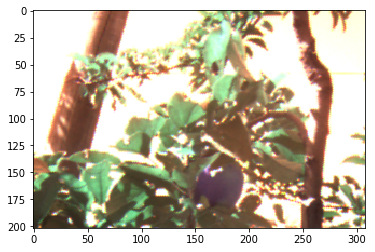

0 98 98 195 184 20130320T004403.421053.Cam6_32.png (202, 308, 3)
1 98 98 107 82 20130320T005748.390478.Cam6_53.png (202, 308, 3)
2 98 98 172 34 20130320T004928.380174.Cam6_52.png (202, 308, 3)
3 98 98 278 122 20130320T012845.190374_42.png (202, 308, 3)
4 98 98 42 195 20130320T005544.578414.Cam6_22.png (202, 308, 3)
5 98 98 88 201 20130320T005553.530973.Cam6_13.png (202, 308, 3)
6 98 98 87 177 20130320T005809.533784.Cam6_12.png (202, 308, 3)
7 98 98 89 205 20130320T005617.912359.Cam6_63.png (202, 308, 3)
8 98 98 132 178 20130320T005108.382236.Cam6_11.png (202, 308, 3)
9 98 98 132 100 20130320T005326.289805.Cam6_63.png (202, 308, 3)
10 98 98 240 117 20130320T004756.568760.Cam6_41.png (202, 308, 3)
11 98 98 215 179 20130320T005044.000731.Cam6_21.png (202, 308, 3)
12 98 98 283 111 20130320T013349.958479_61.png (202, 308, 3)
13 98 98 117 80 20130320T005132.192216.Cam6_23.png (202, 308, 3)
14 98 98 252 45 20130320T005320.384934.Cam6_24.png (202, 308, 3)
15 98 98 100 56 20130320T013611.866233

In [11]:
images = "../Fruits/dataset/apples/dataset/train"
#image = cv.imread(os.path.join(images,a["filename"]))
for j in range(len(annotations)):
    a = annotations[j]
    x = a["regions"][0]["shape_attributes"]["all_points_x"]
    y = a["regions"][0]["shape_attributes"]["all_points_y"]
    image = cv.imread(os.path.join(images,a["filename"]))
    if j==0:
        image = cv.imread(os.path.join(images,a["filename"]))
        plt.imshow(image)
        plt.show()
    print(j,len(x),len(y),max(x),max(y),a["filename"],image.shape)
    if j ==20:
        break
    

In [102]:
a = annotations[0]
a["filename"]

'20130320T004403.421053.Cam6_32.png'

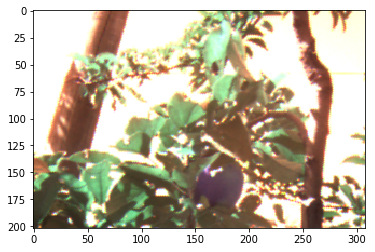

In [95]:
image = cv.imread(os.path.join(images,a["filename"]))
plt.imshow(image)


In [109]:
x = a["regions"][0]["shape_attributes"]["all_points_x"]
y = a["regions"][0]["shape_attributes"]["all_points_y"]

In [110]:
pts = []
for i,j in zip(x,y):
    pts.append([i,j])

In [111]:
pts = np.array(pts)

In [112]:
img = cv.polylines(image,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=10)

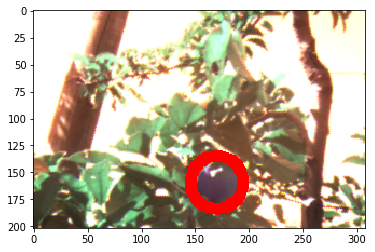

In [113]:
plt.imshow(img)

In [116]:
len(x)

98

In [117]:
len(y)

98